In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

PATH = '../Downloads/'

#폰트 설정하기
plt.rc('font', family='NanumGothic')

#고정 소수점 표기법으로 바꾸기
pd.options.display.float_format = '{:.3f}'.format

c:\users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 데이터 불러오기

In [2]:
jeju_17 = pd.read_csv(PATH + 'jeju_card_region_2017.csv')
jeju_18 = pd.read_csv(PATH + 'jeju_card_region_2018.csv')
po_df = pd.read_csv(PATH + 'jeju_population.csv')

## 데이터 탐색 및 전처리

In [3]:
# 데이터 탐색 및 전처리
print(jeju_17.info())
display(jeju_17.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26968 entries, 0 to 26967
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      26968 non-null  object
 1   시군구명    26968 non-null  object
 2   읍면동명    26968 non-null  object
 3   업종명     26968 non-null  object
 4   성별      26968 non-null  object
 5   이용자수    26968 non-null  int64 
 6   이용금액    26968 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB
None


,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,26968,26968,26968,26968,26968,26968.000,26968.000
unique,12,2,43,41,2,NaN,NaN
top,2017-11-01,제주시,노형동,슈퍼마켓,남성,NaN,NaN
freq,2265,16076,795,1032,13518,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1703.495,63231393.341
std,NaN,NaN,NaN,NaN,NaN,4313.161,198798394.063
min,NaN,NaN,NaN,NaN,NaN,1.000,10.000
25%,NaN,NaN,NaN,NaN,NaN,43.000,2635000.000
50%,NaN,NaN,NaN,NaN,NaN,281.000,12125170.000
75%,NaN,NaN,NaN,NaN,NaN,1333.250,49059281.000


In [4]:
print(jeju_18.info())
display(jeju_18.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27183 entries, 0 to 27182
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      27183 non-null  object
 1   시군구명    27183 non-null  object
 2   읍면동명    27183 non-null  object
 3   업종명     27183 non-null  object
 4   성별      27183 non-null  object
 5   이용자수    27183 non-null  int64 
 6   이용금액    27183 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.5+ MB
None


,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,27183,27183,27183,27183,27183,27183.000,27183.000
unique,12,2,43,41,2,NaN,NaN
top,2018-09-01,제주시,노형동,체인화 편의점,남성,NaN,NaN
freq,2285,16228,812,1032,13645,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1726.604,62044256.570
std,NaN,NaN,NaN,NaN,NaN,4399.634,190042848.439
min,NaN,NaN,NaN,NaN,NaN,1.000,10.000
25%,NaN,NaN,NaN,NaN,NaN,45.000,2706600.000
50%,NaN,NaN,NaN,NaN,NaN,288.000,12311900.000
75%,NaN,NaN,NaN,NaN,NaN,1339.000,49426169.000


In [5]:
print(po_df.info())
display(po_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527026 entries, 0 to 527025
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연월일     527026 non-null  int64 
 1   시군구명    527026 non-null  object
 2   읍면동명    527026 non-null  object
 3   성별      527026 non-null  object
 4   연령대     527026 non-null  object
 5   방문인구    527026 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 24.1+ MB
None


,연월일,시군구명,읍면동명,성별,연령대,방문인구
count,527026.000,527026,527026,527026,527026,527026.000
unique,NaN,2,43,2,9,NaN
top,NaN,제주시,삼도1동,여,60대,NaN
freq,NaN,318669,12264,263533,58592,NaN
mean,20175307.456,NaN,NaN,NaN,NaN,9931.281
std,4999.286,NaN,NaN,NaN,NaN,9974.524
min,20170101.000,NaN,NaN,NaN,NaN,0.000
25%,20170620.000,NaN,NaN,NaN,NaN,3292.000
50%,20171207.000,NaN,NaN,NaN,NaN,6811.000
75%,20180526.000,NaN,NaN,NaN,NaN,12783.000


In [6]:
# NULL 값은 없는걸로 확인

In [7]:
def print_unique_values(df):
    object_columns = df.columns[df.dtypes == 'object']
    for col in object_columns:
        print(f'{col} 컬럼의 unique 값 개수 : {df[col].nunique()}')
        print(sorted(df[col].unique()), '\n')

In [8]:
# unique 개수이 같은 지 확인

In [9]:
print_unique_values(jeju_17)
print_unique_values(jeju_18)

연월 컬럼의 unique 값 개수 : 12
['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'] 

시군구명 컬럼의 unique 값 개수 : 2
['서귀포시', '제주시'] 

읍면동명 컬럼의 unique 값 개수 : 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

업종명 컬럼의 unique 값 개수 : 41
['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업', '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업', '전시 및

In [10]:
# unique 갯수는 동일

In [11]:
# unique 자체가 같은지 확인

for value in jeju_17['업종명'].unique():
    if value not in jeju_18['업종명'].unique():
        print(f'17년 데이터에만 있는 값 : {value}')
        
for value in jeju_18['업종명'].unique():
    if value not in jeju_17['업종명'].unique():
        print(f'18년 데이터에만 있는 값 : {value}')
        
for value in jeju_17['읍면동명'].unique():
    if value not in jeju_18['읍면동명'].unique():
        print(f'17년 데이터에만 있는 값 : {value}')
        
for value in jeju_18['읍면동명'].unique():
    if value not in jeju_17['읍면동명'].unique():
        print(f'18년 데이터에만 있는 값 : {value}')

17년 데이터에만 있는 값 : 기타 갬블링 및 베팅업
18년 데이터에만 있는 값 : 택시 운송업


In [12]:
# 데이터 제거
jeju_17 = jeju_17[jeju_17['업종명'] != '기타 갬블링 및 베팅업']
jeju_18 = jeju_18[jeju_18['업종명'] != '택시 운송업']

#### 2017년과 2018년 카드 데이터를 하나로 합쳐주세요

In [13]:
df = pd.concat([jeju_17, jeju_18], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54146 entries, 0 to 27182
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      54146 non-null  object
 1   시군구명    54146 non-null  object
 2   읍면동명    54146 non-null  object
 3   업종명     54146 non-null  object
 4   성별      54146 non-null  object
 5   이용자수    54146 non-null  int64 
 6   이용금액    54146 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.3+ MB


In [14]:
# 연월이 1일로 모두 표기가 되어있다
df['연월'].unique()

array(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
      dtype=object)

In [15]:
df['연월'] = df['연월'].map(lambda x : x[:-3])

## 데이터 분석

#### 업종별로 인당이용금액이 많은 업종은?
#### 이용금액과 이용자수가 많은 업종 Top 10을 각각 뽑자

In [16]:
groupby_job = df.groupby(['업종명']).sum()
display(groupby_job.sort_values(by='이용금액', ascending=False).head(10))
display(groupby_job.sort_values(by='이용자수', ascending=False).head(10))

,이용자수,이용금액
업종명,,
한식 음식점업,18828766,764903591034
슈퍼마켓,11427536,303567124207
차량용 주유소 운영업,5683264,302282701948
면세점,2122760,216084015155
체인화 편의점,22577070,208385597308
기타 대형 종합 소매업,3026355,176181070237
일반유흥 주점업,541603,116184655729
스포츠 및 레크레이션 용품 임대업,991236,112011498985
정기 항공 운송업,640930,102803758104


,이용자수,이용금액
업종명,,
체인화 편의점,22577070,208385597308
한식 음식점업,18828766,764903591034
슈퍼마켓,11427536,303567124207
차량용 주유소 운영업,5683264,302282701948
서양식 음식점업,3483836,82613944504
빵 및 과자류 소매업,3295046,45801876571
기타 대형 종합 소매업,3026355,176181070237
비알콜 음료점업,2990107,32196462878
"피자, 햄버거, 샌드위치 및 유사 음식점업",2963257,38337318851


#### 인당 이용금액이 많은 지역 Top 10도 뽑아보자

In [17]:
groupby_job['인당이용금액'] = groupby_job['이용금액']/groupby_job['이용자수']

In [18]:
#버스이용자수가 너무 적음
groupby_job.sort_values('인당이용금액', ascending=False).head(5)

,이용자수,이용금액,인당이용금액
업종명,,,
버스 운송업,5,6564000,1312800.000
일반유흥 주점업,541603,116184655729,214519.963
호텔업,261891,55612663219,212350.418
기타 주점업,262989,51724117734,196677.875
기타 수상오락 서비스업,1188,214491300,180548.232


In [19]:
groupby_job = df[df['업종명'] != '버스 운송업'].groupby('업종명').sum()
groupby_job['인당이용금액'] = groupby_job['이용금액']/groupby_job['이용자수']
groupby_job.sort_values('인당이용금액', ascending=False).head(10)

,이용자수,이용금액,인당이용금액
업종명,,,
일반유흥 주점업,541603,116184655729,214519.963
호텔업,261891,55612663219,212350.418
기타 주점업,262989,51724117734,196677.875
기타 수상오락 서비스업,1188,214491300,180548.232
건강보조식품 소매업,43738,7042351269,161012.192
정기 항공 운송업,640930,102803758104,160397.794
골프장 운영업,454602,63978385373,140734.940
마사지업,3621,441834050,122019.898
스포츠 및 레크레이션 용품 임대업,991236,112011498985,113001.847


#### 카드 이용이 많은 지역

In [20]:
groupby_region = df.groupby('읍면동명').sum()

In [21]:
display(groupby_region.sort_values('이용금액', ascending=False).head(10))
display(groupby_region.sort_values('이용자수', ascending=False).head(10))

,이용자수,이용금액
읍면동명,,
연동,7100596,340461915654
용담2동,5820083,289912196043
노형동,7642921,245644045189
송산동,5468346,205357714141
이도2동,6742075,201304448132
천지동,3683576,132477575549
애월읍,3397281,120988320522
중앙동,3053162,118137020208
정방동,3053162,118137020208


,이용자수,이용금액
읍면동명,,
노형동,7642921,245644045189
연동,7100596,340461915654
이도2동,6742075,201304448132
용담2동,5820083,289912196043
송산동,5468346,205357714141
천지동,3683576,132477575549
아라동,3653006,80280971143
애월읍,3397281,120988320522
일도2동,3145294,106631315225


### 인당 소비가 많은 지역에서 활성화된 업종은?

In [22]:
groupby_region['인당이용금액'] = groupby_region['이용금액']/groupby_region['이용자수']
groupby_region.sort_values('인당이용금액', ascending=False).head()

,이용자수,이용금액,인당이용금액
읍면동명,,,
예래동,1259725,72430813294,57497.321
영천동,652686,35970307258,55111.198
용담2동,5820083,289912196043,49812.382
연동,7100596,340461915654,47948.358
일도1동,1161659,55313193619,47615.689


In [23]:
top5_region = groupby_region.sort_values('인당이용금액', ascending=False).head().index

In [24]:
groupby_reg_job = df.groupby(['읍면동명', '업종명']).sum().reset_index()

In [25]:
for region in top5_region:
    reg_df = groupby_reg_job[groupby_reg_job['읍면동명'] == region]
    print(f'{region} : {reg_df.sort_values("이용금액", ascending=False).head()["업종명"].tolist()}')

예래동 : ['호텔업', '한식 음식점업', '차량용 주유소 운영업', '골프장 운영업', '체인화 편의점']
영천동 : ['차량용 주유소 운영업', '슈퍼마켓', '한식 음식점업', '골프장 운영업', '호텔업']
용담2동 : ['면세점', '한식 음식점업', '자동차 임대업', '차량용 주유소 운영업', '관광 민예품 및 선물용품 소매업']
연동 : ['정기 항공 운송업', '한식 음식점업', '일반유흥 주점업', '슈퍼마켓', '체인화 편의점']
일도1동 : ['스포츠 및 레크레이션 용품 임대업', '수산물 소매업', '한식 음식점업', '과실 및 채소 소매업', '체인화 편의점']


#### 데이터를 기반으로 카페 이용자수와 유동인구의 관계에 대해 살펴보자

In [26]:
display(po_df)
print_unique_values(po_df)

,연월일,시군구명,읍면동명,성별,연령대,방문인구
0,20170101,제주시,한림읍,남,40대,19424
1,20170101,제주시,애월읍,여,20대,27747
2,20170101,제주시,구좌읍,남,70대,3459
3,20170101,제주시,조천읍,남,40대,36695
4,20170101,제주시,한경면,남,70대,1174
...,...,...,...,...,...,...
527021,20181231,서귀포시,대륜동,남,40대,22791
527022,20181231,서귀포시,대천동,여,60대,7060
527023,20181231,서귀포시,중문동,남,10세미만,6061
527024,20181231,서귀포시,중문동,여,20대,9482


시군구명 컬럼의 unique 값 개수 : 2
['서귀포시', '제주시'] 

읍면동명 컬럼의 unique 값 개수 : 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

성별 컬럼의 unique 값 개수 : 2
['남', '여'] 

연령대 컬럼의 unique 값 개수 : 9
['10대', '10세미만', '20대', '30대', '40대', '50대', '60대', '70대', '80대이상'] 



In [27]:
po_df.groupby('읍면동명').sum().sort_values('방문인구', ascending=False).head(10)

,연월일,방문인구
읍면동명,,
이도2동,247228204540,401706305
연동,247288746728,357324427
애월읍,247268565877,342324032
노형동,247329108136,335579872
아라동,247187842812,220585732
조천읍,247349289145,196158122
오라동,247268565758,190946435
용담2동,247248384963,183787396
일도2동,247409831256,171495766


In [28]:
df

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300
3,2017-01,서귀포시,대정읍,기타 주점업,남성,324,71843080
4,2017-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000
...,...,...,...,...,...,...,...
27178,2018-12,제주시,오라동,중식 음식점업,여성,110,3043250
27179,2018-12,제주시,연동,스포츠 및 레크레이션 용품 임대업,여성,2317,365724920
27180,2018-12,제주시,연동,호텔업,여성,810,232661992
27181,2018-12,제주시,오라동,기타음식료품위주종합소매업,남성,25,1225510


In [29]:
#제주 데이터와 같은 형태로 변환(연월일)
po_df['연월일'] = po_df['연월일'].map(str).str[:4] + '-' + po_df['연월일'].map(str).str[4:6]
po_df = po_df.rename(columns = {'연월일':'연월'})

In [30]:
#제주 데이터와 같은 형태로 변환(성별)
po_df['성별'] = po_df['성별'] + '성'

In [31]:
groupby_pop = po_df.groupby(['연월', '시군구명', '읍면동명', '성별']).sum().reset_index()

In [32]:
jeju_df = pd.merge(df, groupby_pop, how='left', on=['연월', '시군구명', '읍면동명', '성별'])

In [33]:
#업종명이 비알콜 음료점업인 데이터프레임만들기
cafe_df = jeju_df[jeju_df['업종명'] == '비알콜 음료점업']

In [34]:
cafe_df.groupby('읍면동명').sum().sort_values('이용금액', ascending=False).head(10)

,이용자수,이용금액,방문인구
읍면동명,,,
용담2동,447461,4056159850,183787396.000
이도2동,347756,3647080260,401706305.000
노형동,300088,2738692471,335579872.000
연동,216716,2387394344,357324427.000
애월읍,118980,1593771610,342324032.000
송산동,138608,1536821323,26699487.000
천지동,132038,1425763713,30105838.000
아라동,134662,1322616147,220585732.000
중앙동,95624,1102646313,70051079.000


#### 카페와 유동인구의 관계 시각화

In [35]:
plt.rc('font', family='NanumGothic')

In [36]:
cafe_df

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액,방문인구
8,2017-01,서귀포시,대정읍,비알콜 음료점업,남성,607,11502400,2346595.000
133,2017-01,서귀포시,안덕면,비알콜 음료점업,남성,488,7465400,3304603.000
143,2017-01,서귀포시,대륜동,비알콜 음료점업,여성,1060,8411078,2293711.000
147,2017-01,서귀포시,남원읍,비알콜 음료점업,남성,241,2904000,2844830.000
148,2017-01,서귀포시,동홍동,비알콜 음료점업,여성,827,9229490,2500792.000
...,...,...,...,...,...,...,...,...
54020,2018-12,제주시,이도1동,비알콜 음료점업,여성,828,9529500,2784302.000
54041,2018-12,제주시,화북동,비알콜 음료점업,여성,1184,8892500,2675109.000
54063,2018-12,제주시,한경면,비알콜 음료점업,여성,65,1093500,854970.000
54118,2018-12,제주시,오라동,비알콜 음료점업,여성,1274,21571110,3836727.000


Text(0.5, 1.0, '비알코올 음료점업의 방문 인구와 카드 이용 금액')

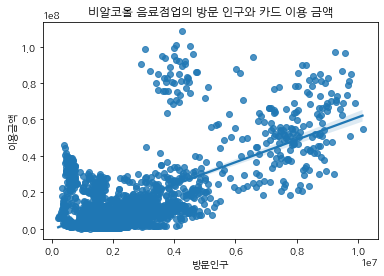

In [37]:
sns.regplot(data=cafe_df, x='방문인구', y='이용금액')
plt.title('비알코올 음료점업의 방문 인구와 카드 이용 금액')

In [38]:
cafe_df.corr()

,이용자수,이용금액,방문인구
이용자수,1.000,0.984,0.599
이용금액,0.984,1.000,0.633
방문인구,0.599,0.633,1.000


Text(0.5, 1.0, '전체 업종의 방문 인구와 카드 이용 금액')

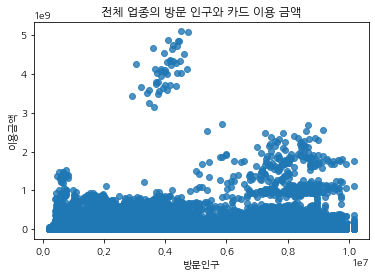

In [39]:
sns.regplot(data=jeju_df, x='방문인구', y='이용금액')
plt.title('전체 업종의 방문 인구와 카드 이용 금액')

In [40]:
jeju_df.corr()

,이용자수,이용금액,방문인구
이용자수,1.000,0.712,0.202
이용금액,0.712,1.000,0.163
방문인구,0.202,0.163,1.000
